## Loading the Dataset

In [1]:
from data import STEAD
stead = STEAD('/home/srivastava-shared/data')
print(stead)

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-21 05:55:00,noise,109C.TA_201510210555_NO
1,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-06 14:50:00,noise,109C.TA_201511061450_NO
2,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-07 02:20:00,noise,109C.TA_201511070220_NO
3,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-14 05:15:00,noise,109C.TA_201511140515_NO
4,TA,109C,HH,32.8889,-117.1051,150.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-25 18:50:00,noise,109C.TA_201512251850_NO


Dataset containing 1265657 seismological waveforms.
Metadata: Available
Waveform data: Available


## Getting Data and Labels in the format for CREIME

In [2]:
X = stead.get_polarcap_data(stead.trace_list()[-20:])

 85%|████████▌ | 17/20 [00:00<00:00, 36.81it/s]

In [3]:
X

array([[-2.8525189e-01,  2.5448000e-01, -4.6293716e+00, ...,
         9.9314644e+01, -1.6023405e+02, -1.5115138e+02],
       [ 5.0538054e+00,  8.4808311e+00,  6.6022897e+00, ...,
         2.3498533e+01, -1.2147193e+01, -8.3393993e+00],
       [-4.7866292e+00,  3.2013546e+01,  4.1937378e+01, ...,
         2.8627124e+02,  2.6816183e+02, -5.4430223e+00],
       ...,
       [ 4.9083829e+00,  5.3857875e+00, -6.2170334e+00, ...,
         4.0760617e+02,  1.2841855e+03,  6.8500421e+02],
       [ 1.9710936e+01,  2.3225965e+01,  1.3339982e+01, ...,
         1.6665749e+01,  6.0214496e+00, -3.9406204e+01],
       [-3.6149843e+00, -3.3677917e+00, -3.1758742e+00, ...,
         5.7364048e+01,  1.3742912e+01, -1.4349239e+02]], dtype=float32)

In [4]:
from visualizations import plot_polarcap_data

100%|██████████| 20/20 [00:00<00:00, 30.59it/s]


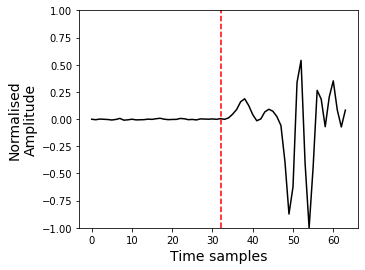

In [5]:
plot_polarcap_data(X[6])

## Loading PolarCAP

In [6]:
from models import PolarCAP
polarcap = PolarCAP()
print(polarcap)

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 64, 1)]      0           []                               
                                                                                                  
 conv1d_104 (Conv1D)            (None, 64, 32)       1056        ['input_23[0][0]']               
                                                                                                  
 dropout_22 (Dropout)           (None, 64, 32)       0           ['conv1d_104[0][0]']             
                                                                                                  
 batch_normalization_84 (BatchN  (None, 64, 32)      128         ['dropout_22[0][0]']             
 ormalization)                                                                             

In [7]:
predictions = polarcap.predict(X)

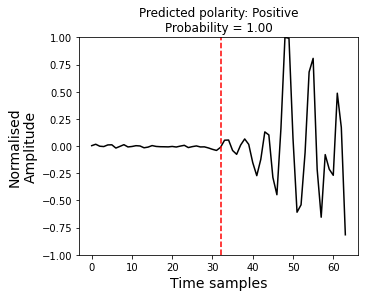

In [8]:
plot_polarcap_data(X[3], predictions[3])

In [9]:
predictions

[('Positive', 0.999995),
 ('Positive', 0.99998987),
 ('Positive', 0.98861665),
 ('Positive', 0.9991629),
 ('Positive', 0.99995756),
 ('Positive', 0.9994506),
 ('Positive', 0.9880166),
 ('Negative', 0.9534959),
 ('Positive', 0.99986684),
 ('Negative', 0.99048024),
 ('Positive', 0.9995993),
 ('Positive', 0.999851),
 ('Positive', 0.9994962),
 ('Negative', 0.9998591),
 ('Negative', 0.9997756),
 ('Negative', 0.9999994),
 ('Positive', 0.99996495),
 ('Positive', 0.9998559),
 ('Negative', 0.8240372),
 ('Negative', 0.9999751)]

Alternatively

In [10]:
model = polarcap.get_model()

In [11]:
y_pred = model.predict(X)